In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from datetime import datetime

In [2]:
df1 = pd.read_csv('D:/Study/Guvi/MDTM33/0 03 Projects/1 05 Singapore Resale Flat Prices Predicting/ResaleFlatPrices/Resale Flat Prices 1990 - 1999.csv')
df2 = pd.read_csv('D:/Study/Guvi/MDTM33/0 03 Projects/1 05 Singapore Resale Flat Prices Predicting/ResaleFlatPrices/Resale Flat Prices 2000 - Feb 2012.csv')
df3 = pd.read_csv('D:/Study/Guvi/MDTM33/0 03 Projects/1 05 Singapore Resale Flat Prices Predicting/ResaleFlatPrices/Resale Flat Prices From Jan 2015 to Dec 2016.csv')
df4 = pd.read_csv('D:/Study/Guvi/MDTM33/0 03 Projects/1 05 Singapore Resale Flat Prices Predicting/ResaleFlatPrices/Resale Flat Prices From Mar 2012 to Dec 2014.csv')
df5 = pd.read_csv('D:/Study/Guvi/MDTM33/0 03 Projects/1 05 Singapore Resale Flat Prices Predicting/ResaleFlatPrices/Resale flat prices based on registration date from Jan-2017 onwards.csv')

In [3]:
# Concatenate the dataframes along the rows (axis=0)
flat_df = pd.concat([df1, df2, df3, df4, df5], axis=0).reset_index(drop=True)

# Print the concatenated dataframe
print(flat_df)

          month        town  flat_type block       street_name storey_range  \
0       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4       1990-01  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...         ...         ...        ...   ...               ...          ...   
938264  2024-10      YISHUN     5 ROOM   870      YISHUN ST 81     04 TO 06   
938265  2024-10      YISHUN  EXECUTIVE   654      YISHUN AVE 4     10 TO 12   
938266  2024-10      YISHUN  EXECUTIVE   654      YISHUN AVE 4     04 TO 06   
938267  2024-10      YISHUN  EXECUTIVE   358    YISHUN RING RD     01 TO 03   
938268  2024-10      YISHUN  EXECUTIVE   824      YISHUN ST 81     10 TO 12   

        floor_area_sqm      flat_model  lease_comme

In [4]:
flat_df.drop_duplicates().reset_index(drop=True)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
936361,2024-10,YISHUN,5 ROOM,870,YISHUN ST 81,04 TO 06,122.0,Improved,1987,690000.0,62 years 04 months
936362,2024-10,YISHUN,EXECUTIVE,654,YISHUN AVE 4,10 TO 12,164.0,Apartment,1992,1000000.0,66 years 09 months
936363,2024-10,YISHUN,EXECUTIVE,654,YISHUN AVE 4,04 TO 06,164.0,Apartment,1992,995000.0,66 years 09 months
936364,2024-10,YISHUN,EXECUTIVE,358,YISHUN RING RD,01 TO 03,145.0,Maisonette,1988,888888.0,62 years 09 months


In [5]:
flat_df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
dtype: object

In [6]:
flat_df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [7]:
flat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938269 entries, 0 to 938268
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                938269 non-null  object 
 1   town                 938269 non-null  object 
 2   flat_type            938269 non-null  object 
 3   block                938269 non-null  object 
 4   street_name          938269 non-null  object 
 5   storey_range         938269 non-null  object 
 6   floor_area_sqm       938269 non-null  float64
 7   flat_model           938269 non-null  object 
 8   lease_commence_date  938269 non-null  int64  
 9   resale_price         938269 non-null  float64
 10  remaining_lease      229219 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 78.7+ MB


In [8]:
print(flat_df.shape[0])

938269


In [9]:
percent_null_remaining_lease=((flat_df['remaining_lease'].isnull().sum())/flat_df.shape[0])*100
print(percent_null_remaining_lease)

75.57001243779769


In [10]:
flat_df.drop(columns=['remaining_lease'], inplace=True)

In [11]:
column_names = flat_df.columns.tolist()
print(column_names)
flat_df.info()

['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938269 entries, 0 to 938268
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                938269 non-null  object 
 1   town                 938269 non-null  object 
 2   flat_type            938269 non-null  object 
 3   block                938269 non-null  object 
 4   street_name          938269 non-null  object 
 5   storey_range         938269 non-null  object 
 6   floor_area_sqm       938269 non-null  float64
 7   flat_model           938269 non-null  object 
 8   lease_commence_date  938269 non-null  int64  
 9   resale_price         938269 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 71.6+ MB


In [12]:
flat_df.rename(columns={'month': 'yearly_month'}, inplace=True)

In [13]:
flat_df[['storey_start_point', 'storey_end_point']] = flat_df['storey_range'].str.split(' TO ', expand=True)

# Convert the new columns to integers
flat_df['storey_start_point'] = flat_df['storey_start_point'].astype(int)
flat_df['storey_end_point'] = flat_df['storey_end_point'].astype(int)

flat_df[['year', 'month']] = flat_df['yearly_month'].str.split('-', expand=True)

flat_df['year']=flat_df['year'].astype(int)
flat_df['month']=flat_df['month'].astype(int)

flat_df.rename(columns={'lease_commence_date': 'lease_commence_year'}, inplace=True)

current_year = datetime.now().year
flat_df['remaining_lease'] = current_year - pd.to_datetime(flat_df['lease_commence_year']).dt.year

flat_df['price_per_sqm']=flat_df['resale_price'] // flat_df['floor_area_sqm']

flat_df.drop(columns=['storey_range'], inplace=True)
flat_df.drop(columns=['yearly_month'], inplace=True)

In [14]:
unique_values = flat_df['town'].unique()
print(len(unique_values))

27


In [15]:
unique_values = flat_df['flat_type'].unique()
print(len(unique_values))

8


In [16]:
print(len(flat_df['town'].unique()))
print(len(flat_df['flat_type'].unique()))
print(len(flat_df['block'].unique()))
print(len(flat_df['street_name'].unique()))
print(len(flat_df['flat_model'].unique()))

27
8
2719
588
34


In [17]:
from scipy.stats import skew

for col in ['floor_area_sqm','lease_commence_year','storey_start_point','storey_end_point','resale_price','price_per_sqm','year','month']:
    print(f'Skewness of {col}: {skew(flat_df[col])}')

Skewness of floor_area_sqm: 0.366326283213721
Skewness of lease_commence_year: 0.6590696948037236
Skewness of storey_start_point: 1.360470330837957
Skewness of storey_end_point: 1.3611204112045303
Skewness of resale_price: 0.9667625846189782
Skewness of price_per_sqm: 1.1008013388155693
Skewness of year: 0.2901237061167718
Skewness of month: -0.037973303348287905


In [18]:
# Apply square root transformation
skew_columns = ['storey_start_point', 'storey_end_point', 'price_per_sqm', 'resale_price']

for col in skew_columns:
    flat_df[col + '_sqrt'] = np.sqrt(flat_df[col])

# Check skewness after square root transformation
for col in skew_columns:
    print(f"Skewness of {col} after sqrt transformation: {skew(flat_df[col + '_sqrt'].dropna())}")

flat_df.drop(columns=['storey_start_point','storey_end_point','resale_price','price_per_sqm'], inplace=True)

Skewness of storey_start_point after sqrt transformation: 0.1501574172030267
Skewness of storey_end_point after sqrt transformation: 0.4183413717374944
Skewness of price_per_sqm after sqrt transformation: 0.24648394686035552
Skewness of resale_price after sqrt transformation: 0.12690355715022725


In [19]:
flat_df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_year,year,month,remaining_lease,storey_start_point_sqrt,storey_end_point_sqrt,price_per_sqm_sqrt,resale_price_sqrt
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,1990,1,55,3.162278,3.464102,17.029386,94.868330
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,1990,1,55,2.000000,2.449490,13.892444,77.459667
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,1990,1,55,3.162278,3.464102,16.062378,89.442719
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,1990,1,55,2.645751,3.000000,13.892444,77.459667
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,1990,1,55,2.000000,2.449490,25.416530,217.255610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938264,YISHUN,5 ROOM,870,YISHUN ST 81,122.0,Improved,1987,2024,10,55,2.000000,2.449490,75.199734,830.662386
938265,YISHUN,EXECUTIVE,654,YISHUN AVE 4,164.0,Apartment,1992,2024,10,55,3.162278,3.464102,78.083289,1000.000000
938266,YISHUN,EXECUTIVE,654,YISHUN AVE 4,164.0,Apartment,1992,2024,10,55,2.000000,2.449490,77.890949,997.496867
938267,YISHUN,EXECUTIVE,358,YISHUN RING RD,145.0,Maisonette,1988,2024,10,55,1.000000,1.732051,78.294317,942.808570


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot(df, column):
    plt.figure(figsize=(20,5))

    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column, color='green')
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50, color="red")
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column, color='indigo')
    plt.title(f'Violin Plot for {column}')
    plt.show()

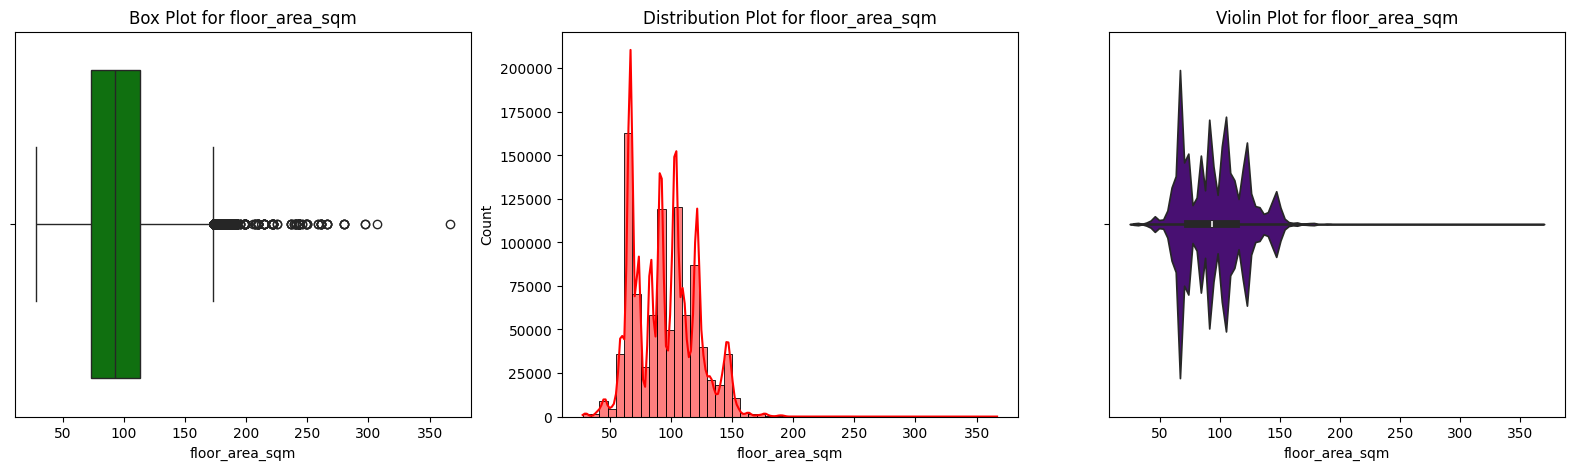

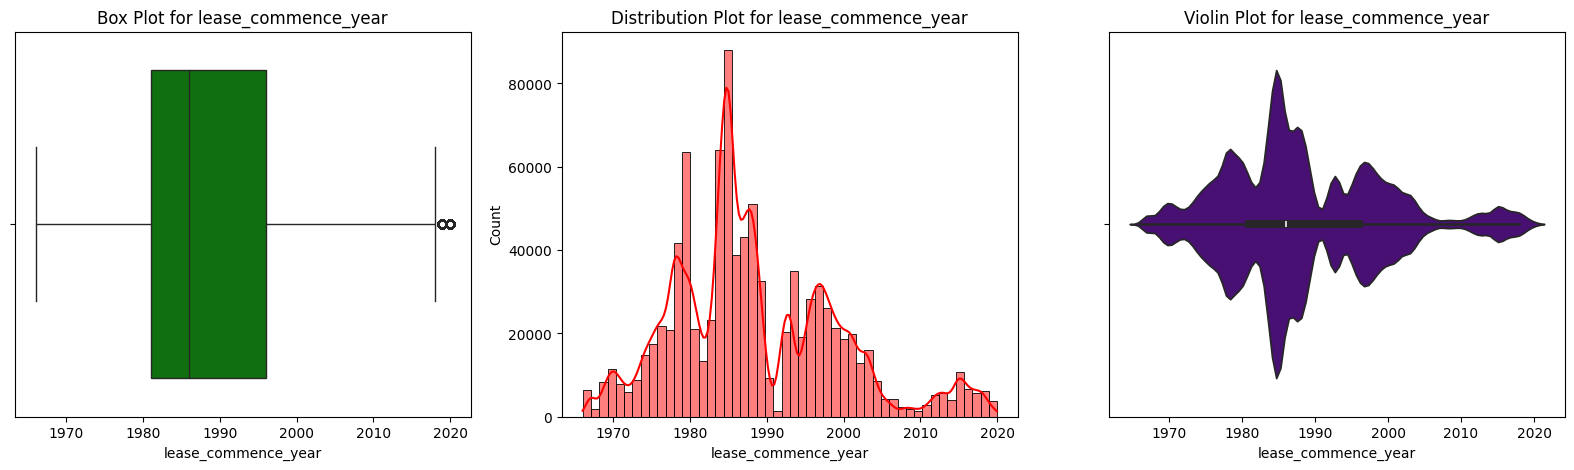

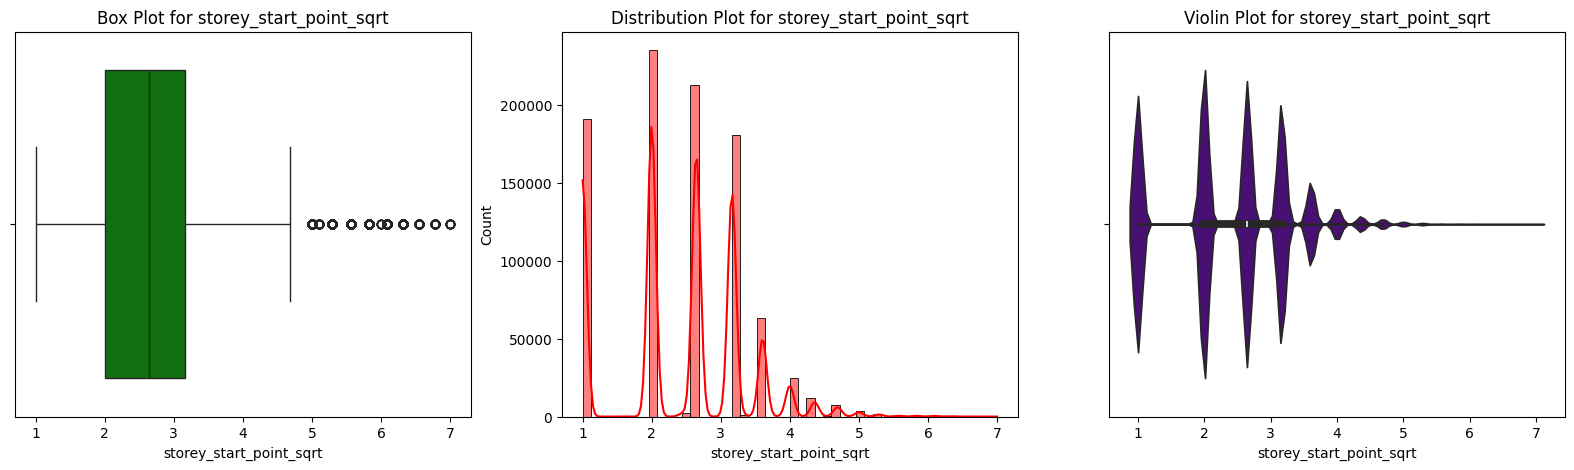

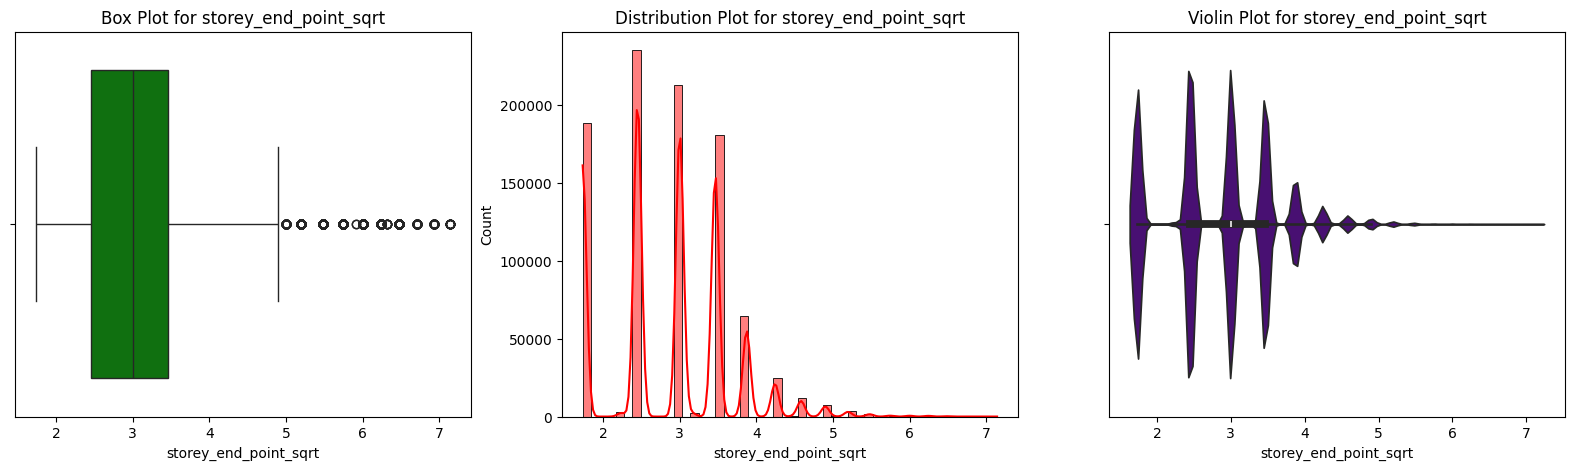

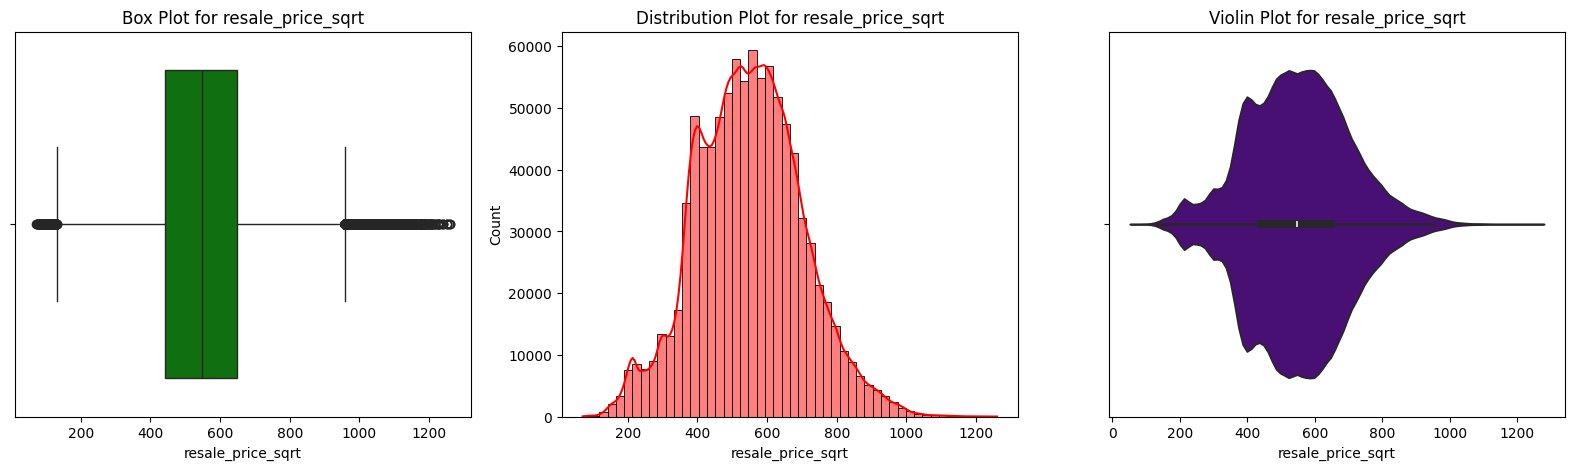

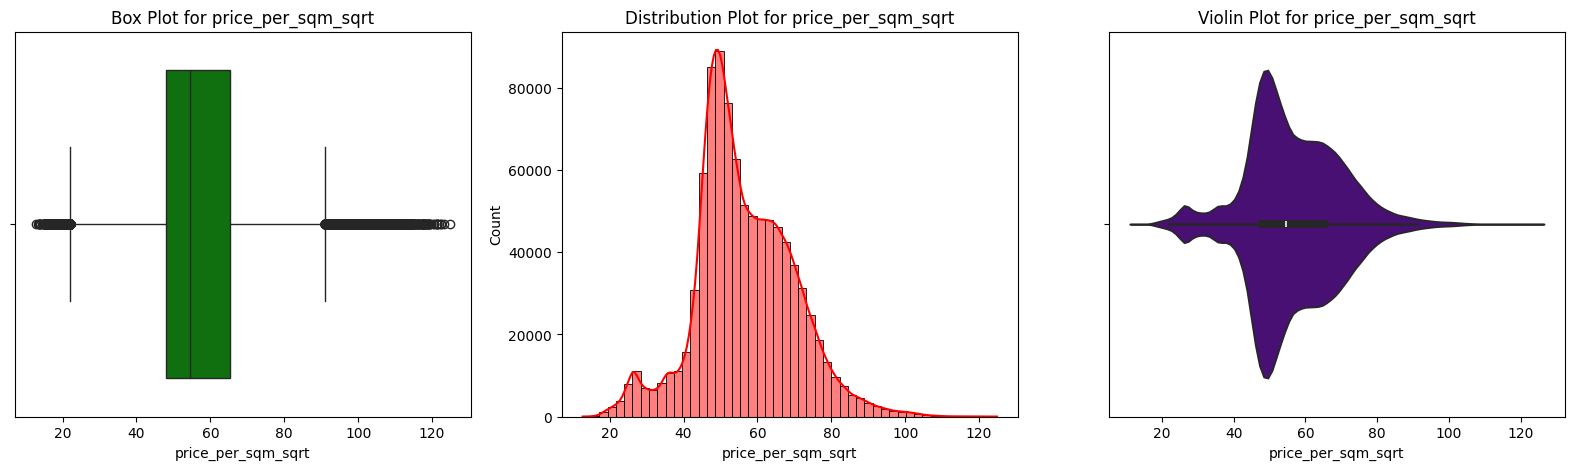

In [21]:
for col in ['floor_area_sqm','lease_commence_year','storey_start_point_sqrt','storey_end_point_sqrt','resale_price_sqrt','price_per_sqm_sqrt']:
    plot(flat_df, col)

In [22]:
# Outliers Treatment

# Define the function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q2 = df[column].quantile(0.75)
    IQR = Q2 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q2 + 1.5 * IQR
    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    return df

# Apply the IQR method to continuous variables
continuous_var = ['floor_area_sqm','lease_commence_year','storey_start_point_sqrt','storey_end_point_sqrt','resale_price_sqrt','price_per_sqm_sqrt']
for col in continuous_var:
    flat_df = remove_outliers_iqr(flat_df, col)

# Check the shape of the dataframe after outlier removal
print(f"Reshaped Dataframe after Outlier Treatment: {flat_df.shape}")

# Reset the index
flat_df.reset_index(drop=True, inplace=True)

Reshaped Dataframe after Outlier Treatment: (910847, 14)


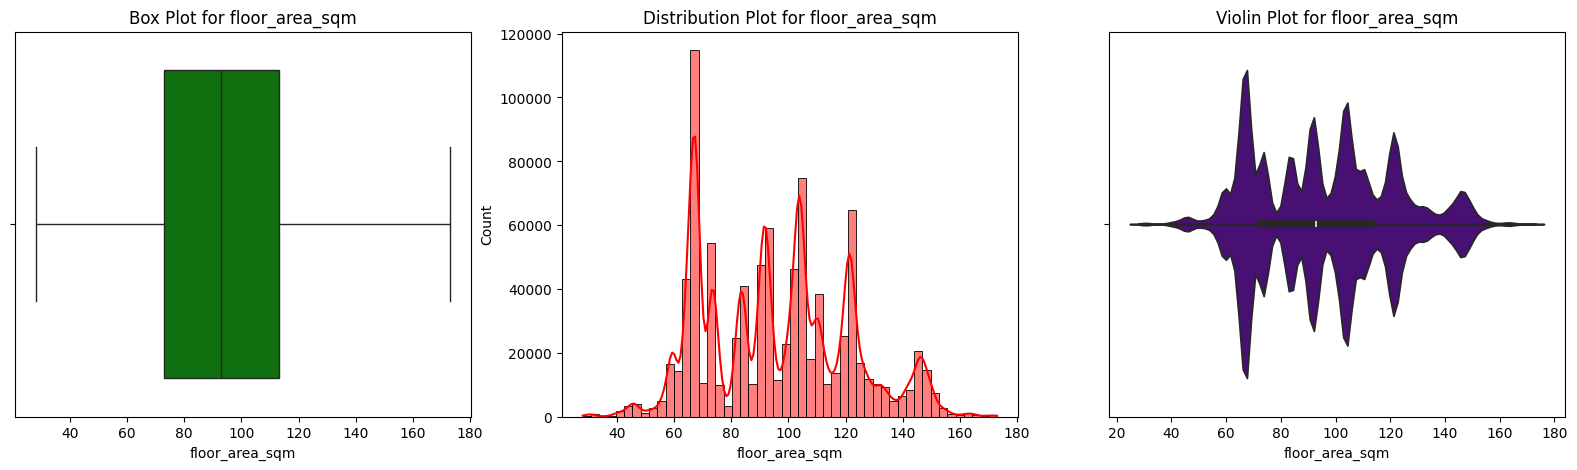

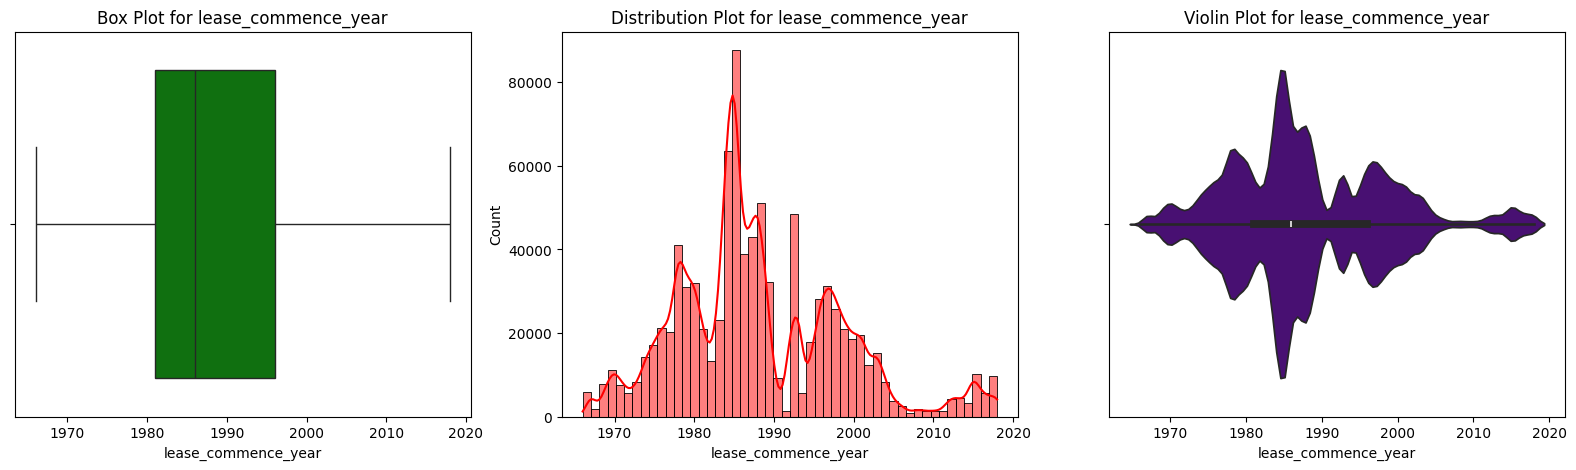

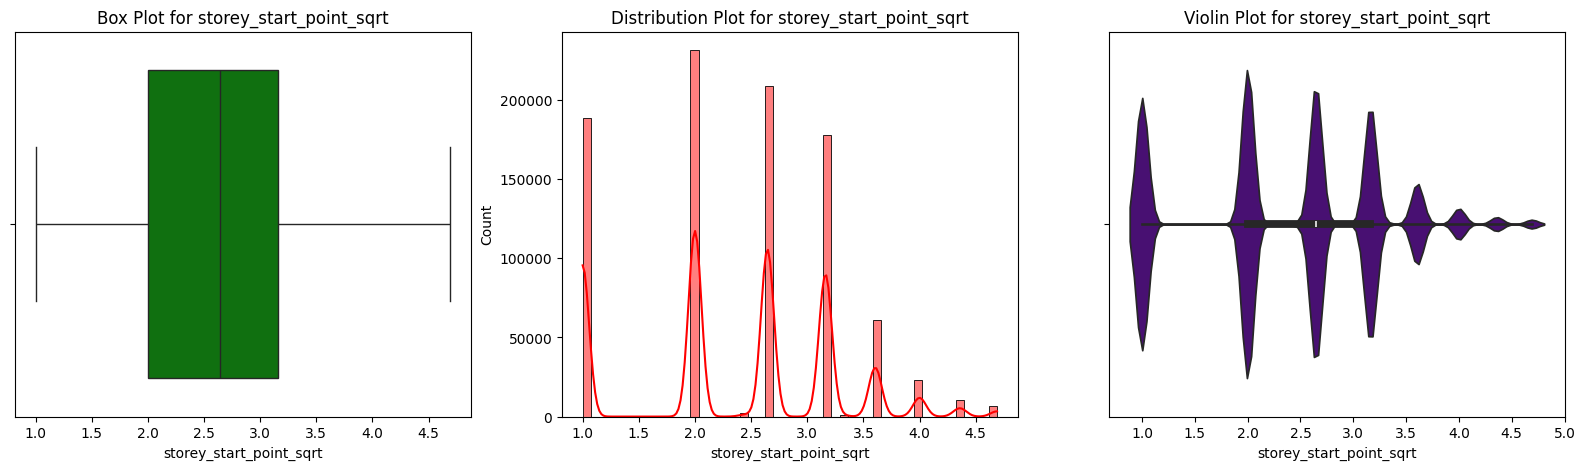

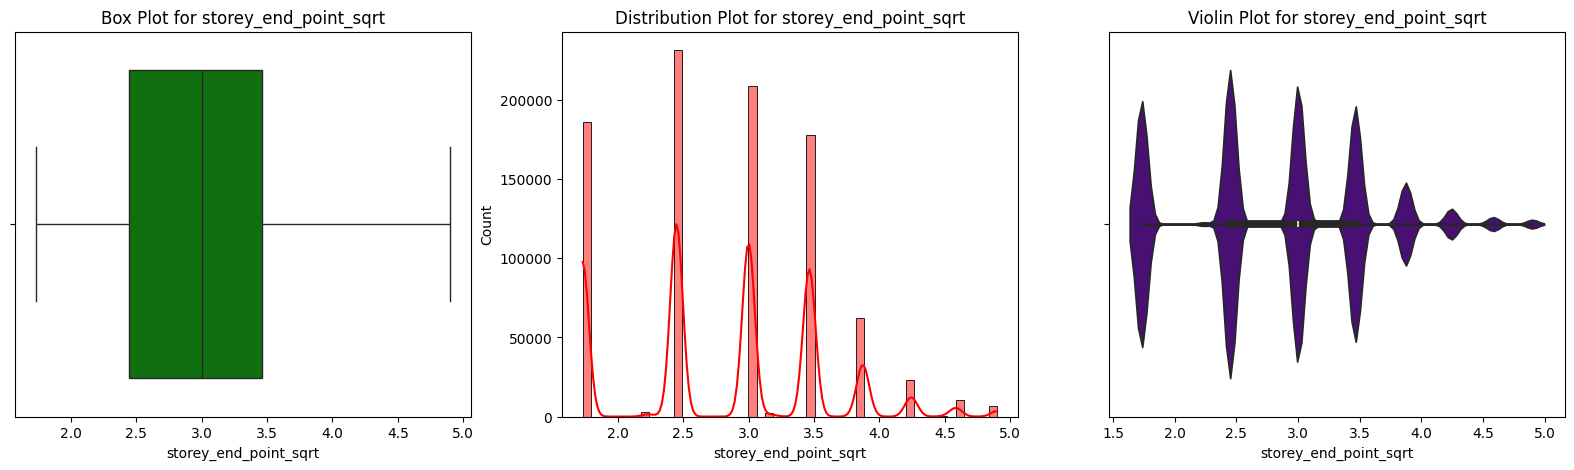

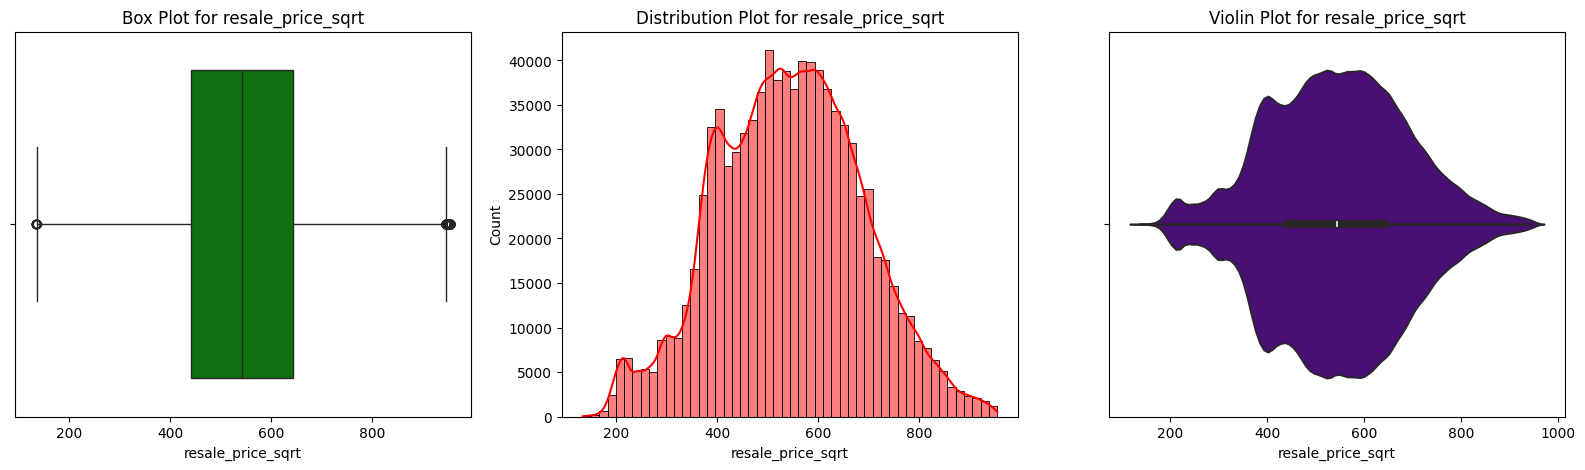

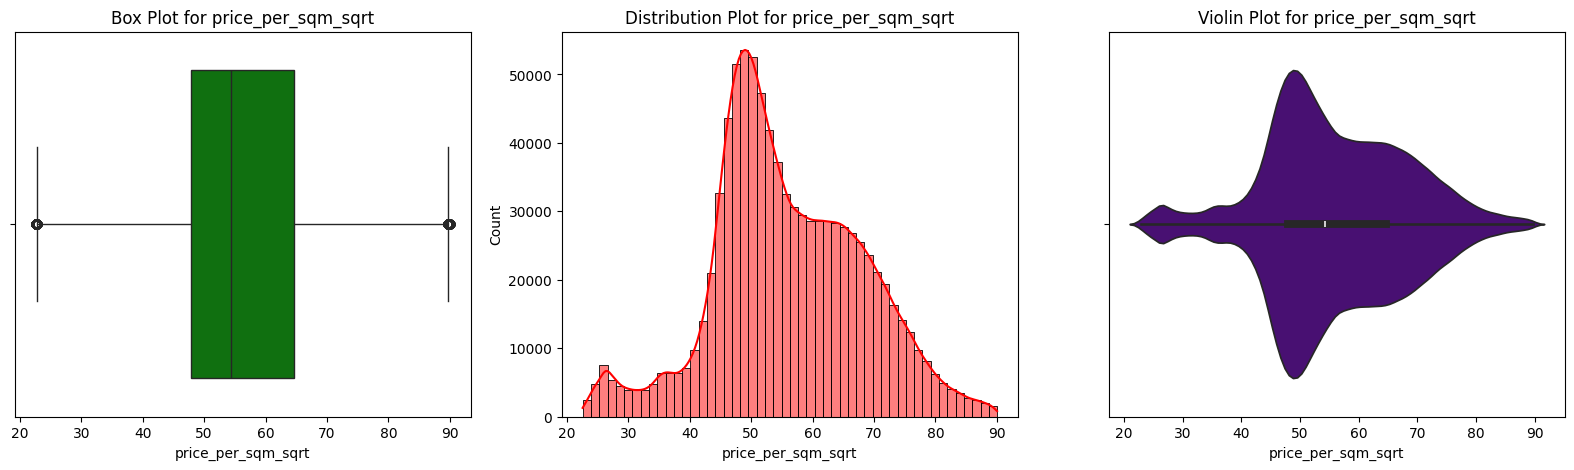

In [23]:
# plotting the features to check skew and outliers

for col in ['floor_area_sqm','lease_commence_year','storey_start_point_sqrt','storey_end_point_sqrt','resale_price_sqrt','price_per_sqm_sqrt']:
    plot(flat_df, col)

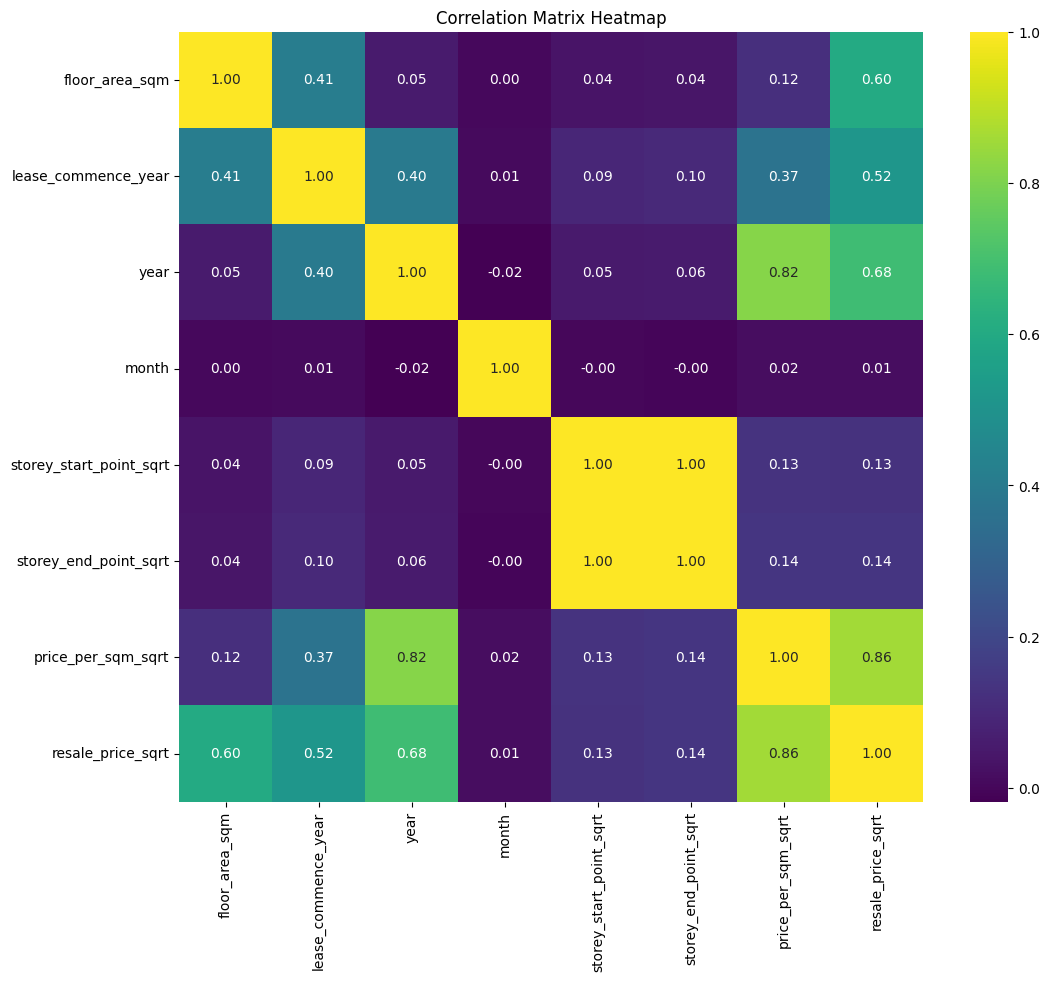

In [24]:
correlation_matrix = flat_df[['floor_area_sqm', 'lease_commence_year', 'year', 'month', 'storey_start_point_sqrt','storey_end_point_sqrt', 'price_per_sqm_sqrt','resale_price_sqrt']].corr()

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [25]:
# Assuming 'correlation_matrix' is your correlation matrix DataFrame

# Print correlation values for specific columns
columns_of_interest = ['floor_area_sqm', 'lease_commence_year', 'storey_start_point_sqrt', 
                        'storey_end_point_sqrt', 'price_per_sqm_sqrt', 'resale_price_sqrt']

for column in columns_of_interest:
    print(f"Correlation with {column}: {correlation_matrix.loc['resale_price_sqrt', column]:.2f}")

Correlation with floor_area_sqm: 0.60
Correlation with lease_commence_year: 0.52
Correlation with storey_start_point_sqrt: 0.13
Correlation with storey_end_point_sqrt: 0.14
Correlation with price_per_sqm_sqrt: 0.86
Correlation with resale_price_sqrt: 1.00


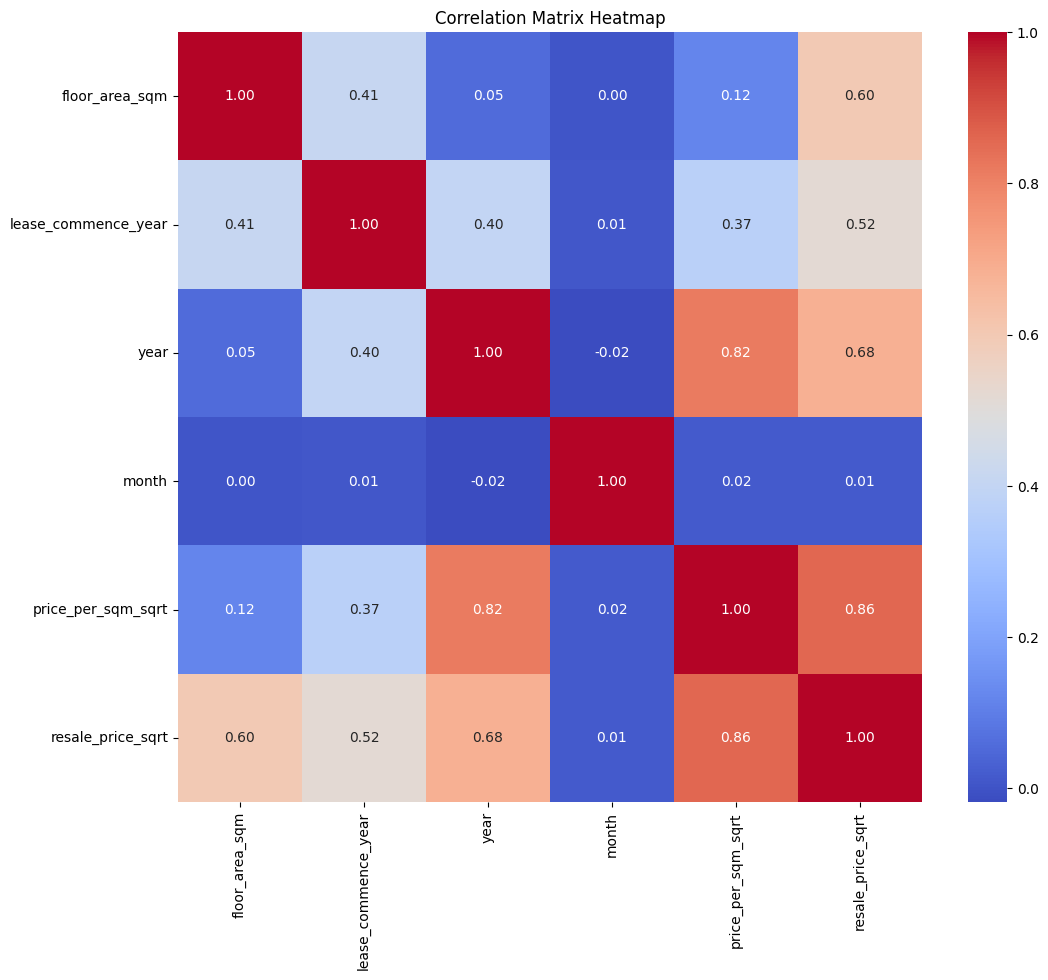

In [26]:
correlation_matrix = flat_df[['floor_area_sqm', 'lease_commence_year', 'year', 'month', 'price_per_sqm_sqrt','resale_price_sqrt']].corr()

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [26]:
MACHINE LEARNING

SyntaxError: invalid syntax (1421242766.py, line 1)

In [27]:
price_pred_df=flat_df.copy()
price_pred_df.drop(columns=['storey_start_point_sqrt','storey_end_point_sqrt'], inplace=True)
price_pred_df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_year,year,month,remaining_lease,price_per_sqm_sqrt,resale_price_sqrt
0,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,1990,1,55,25.416530,217.255610
1,ANG MO KIO,3 ROOM,211,ANG MO KIO AVE 3,67.0,NEW GENERATION,1977,1990,1,55,26.191602,214.476106
2,ANG MO KIO,3 ROOM,202,ANG MO KIO AVE 3,67.0,NEW GENERATION,1977,1990,1,55,25.019992,204.939015
3,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,67.0,NEW GENERATION,1977,1990,1,55,23.811762,194.935887
4,ANG MO KIO,3 ROOM,235,ANG MO KIO AVE 3,67.0,NEW GENERATION,1977,1990,1,55,24.433583,200.000000


In [28]:
print(len(price_pred_df['town'].unique()))
print(len(price_pred_df['flat_type'].unique()))
print(len(price_pred_df['block'].unique()))
print(len(price_pred_df['street_name'].unique()))
print(len(price_pred_df['flat_model'].unique()))

27
8
2627
579
34


In [29]:
price_pred_df.to_csv('sfrpp.csv', index=False)

In [30]:
# Pre-Processing:

# dropping hypen:
price_pred_df['flat_type']=price_pred_df['flat_type'].str.replace("-"," ")

# Deal with capitalized values
price_pred_df['flat_model'] = price_pred_df['flat_model'].str.lower()

In [31]:
from sklearn.preprocessing import LabelEncoder

def encode(df,columns):
    le = LabelEncoder()

    df[columns]=le.fit_transform(df[columns])

    keys =le.classes_
    values = le.transform(keys)

    for key,value in zip(keys,values):
        print(key,":",value)

In [32]:
price_pred_df.drop(columns=['block','street_name'], inplace=True)

In [33]:
encode(price_pred_df,'town')
encode(price_pred_df,'flat_type')
encode(price_pred_df,'flat_model')

ANG MO KIO : 0
BEDOK : 1
BISHAN : 2
BUKIT BATOK : 3
BUKIT MERAH : 4
BUKIT PANJANG : 5
BUKIT TIMAH : 6
CENTRAL AREA : 7
CHOA CHU KANG : 8
CLEMENTI : 9
GEYLANG : 10
HOUGANG : 11
JURONG EAST : 12
JURONG WEST : 13
KALLANG/WHAMPOA : 14
LIM CHU KANG : 15
MARINE PARADE : 16
PASIR RIS : 17
PUNGGOL : 18
QUEENSTOWN : 19
SEMBAWANG : 20
SENGKANG : 21
SERANGOON : 22
TAMPINES : 23
TOA PAYOH : 24
WOODLANDS : 25
YISHUN : 26
1 ROOM : 0
2 ROOM : 1
3 ROOM : 2
4 ROOM : 3
5 ROOM : 4
EXECUTIVE : 5
MULTI GENERATION : 6
2-room : 0
3gen : 1
adjoined flat : 2
apartment : 3
dbss : 4
improved : 5
improved-maisonette : 6
maisonette : 7
model a : 8
model a-maisonette : 9
model a2 : 10
multi generation : 11
new generation : 12
premium apartment : 13
premium apartment loft : 14
premium maisonette : 15
simplified : 16
standard : 17
terrace : 18
type s1 : 19
type s2 : 20


In [34]:
price_pred_df

,town,flat_type,floor_area_sqm,flat_model,lease_commence_year,year,month,remaining_lease,price_per_sqm_sqrt,resale_price_sqrt
0,0,2,73.0,12,1976,1990,1,55,25.416530,217.255610
1,0,2,67.0,12,1977,1990,1,55,26.191602,214.476106
2,0,2,67.0,12,1977,1990,1,55,25.019992,204.939015
3,0,2,67.0,12,1977,1990,1,55,23.811762,194.935887
4,0,2,67.0,12,1977,1990,1,55,24.433583,200.000000
...,...,...,...,...,...,...,...,...,...,...
910842,26,4,112.0,5,2018,2024,10,55,81.767964,865.383152
910843,26,4,123.0,5,1988,2024,10,55,76.928538,853.229160
910844,26,4,141.0,8,1992,2024,10,55,75.319320,894.427191
910845,26,4,122.0,5,1987,2024,10,55,75.199734,830.662386


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
import numpy as np

def best_ML_algorithm(df,algorithms):
        x=df.drop(columns=['resale_price_sqrt'],axis=1)
        y=df['resale_price_sqrt']

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        results={}

        for algorithm in algorithms:

                model=algorithm().fit(X_train,y_train)
                y_pred=model.predict(X_test)
                
                MAE=metrics.mean_absolute_error(y_test, y_pred)
                MSE=metrics.mean_squared_error(y_test, y_pred)
                RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
                r2 = metrics.r2_score(y_test, y_pred)

                results[algorithm.__name__] = {'Mean Absolute Error':MAE,'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE,
                                        'R² score':r2}
                
        best_algorithm = max(results.items(), key=lambda item: item[1]['R² score'])[0]  
        
        return best_algorithm, results

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor

algorithms = [LinearRegression, DecisionTreeRegressor, ExtraTreesRegressor, RandomForestRegressor,
            GradientBoostingRegressor]
best_algorithm, results = best_ML_algorithm(price_pred_df, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**",best_algorithm)

**Evaluation Metrics for All Algorithms:**
                           Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  R² score
LinearRegression                     10.530634          242.190803                15.562481  0.988200
DecisionTreeRegressor                 0.084994            0.279711                 0.528877  0.999986
ExtraTreesRegressor                   0.073446            0.172639                 0.415498  0.999992
RandomForestRegressor                 0.067487            0.093729                 0.306152  0.999995
GradientBoostingRegressor             4.297932           32.377308                 5.690106  0.998422
**Best Algorithm:** RandomForestRegressor


In [37]:
from sklearn.ensemble import RandomForestRegressor

#Features & Target:
x=price_pred_df.drop(columns=['resale_price_sqrt'],axis=1)
y=price_pred_df['resale_price_sqrt']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Model Training:
model_rfr = RandomForestRegressor(n_estimators=150,max_depth=20)
model_rfr.fit(X_train, y_train)

# Prediction:
y_predict = model_rfr.predict(X_test)

# Evaluation:
mae = metrics.mean_absolute_error(y_test, y_predict)
mse = metrics.mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print('Mean Absolute Error: {:.4f}'.format(mae))
print('Mean Squared Error: {:.4f}'.format(mse))
print('Root Mean Squared Error: {:.4f}'.format(rmse))
print('R² score: {:.4f}'.format(r2))

Mean Absolute Error: 0.0659
Mean Squared Error: 0.0895
Root Mean Squared Error: 0.2992
R² score: 1.0000


In [38]:
feature_scores = pd.Series(model_rfr.feature_importances_, index=x.columns).sort_values(ascending=False)
feature_scores

price_per_sqm_sqrt     0.731658
floor_area_sqm         0.248889
flat_type              0.019443
lease_commence_year    0.000003
flat_model             0.000002
town                   0.000002
year                   0.000001
month                  0.000001
remaining_lease        0.000000
dtype: float64

In [39]:
import pickle

with open("sfrpp_randomforestregressor.pkl","wb") as files:
    pickle.dump(model_rfr, files)

In [42]:
with open('sfrpp_randomforestregressor.pkl','rb') as files:
    predict_model=pickle.load(files)

In [43]:
input=predict_model.predict(np.array([[0,2,73.0,12,1976,1990,1,54,25.416530]]))
predict_resale_price = input[0] ** 2

print(f"Predicted Resale Price: {predict_resale_price:.2f}")

Predicted Resale Price: 47198.85
